In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [3]:
img=image.load_img("C:/Users/DHARSINI/OneDrive/Pictures/basedata/train/happy/001.jpg")

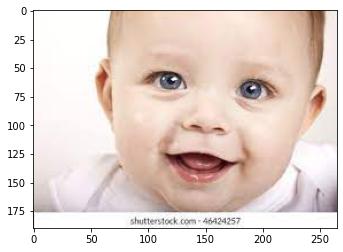

In [4]:
plt.imshow(img)

In [5]:
cv2.imread("C:/Users/DHARSINI/OneDrive/Pictures/basedata/train/happy/001.jpg").shape

(190, 265, 3)

In [6]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [7]:
 train_dataset=train.flow_from_directory('C:/Users/DHARSINI/OneDrive/Pictures/basedata/train/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory('C:/Users/DHARSINI/OneDrive/Pictures/basedata/validation/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 20 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [9]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 #
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 ##
                                 tf.keras.layers.Flatten(),
                                 ##
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 ##
                                 tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])


In [10]:
model.compile(loss='binary_crossentropy',
             optimizer= RMSprop(lr=0.001),
             metrics=['accuracy'])

C:\Users\DHARSINI\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=40,
                   validation_data=validation_dataset)


Epoch 1/40
3/3 [==============================] - 2s 580ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.7363 - val_accuracy: 0.6000
Epoch 2/40
3/3 [==============================] - 2s 584ms/step - loss: 2.0105e-04 - accuracy: 1.0000 - val_loss: 1.7759 - val_accuracy: 0.6000
Epoch 3/40
3/3 [==============================] - 2s 585ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.0820 - val_accuracy: 0.6000
Epoch 4/40
3/3 [==============================] - 2s 538ms/step - loss: 3.6936e-04 - accuracy: 1.0000 - val_loss: 2.2024 - val_accuracy: 0.6000
Epoch 5/40
3/3 [==============================] - 2s 581ms/step - loss: 1.6826e-04 - accuracy: 1.0000 - val_loss: 2.2252 - val_accuracy: 0.6000
Epoch 6/40
3/3 [==============================] - 2s 632ms/step - loss: 5.2550e-05 - accuracy: 1.0000 - val_loss: 2.3040 - val_accuracy: 0.6000
Epoch 7/40
3/3 [==============================] - 2s 586ms/step - loss: 8.2695e-05 - accuracy: 1.0000 - val_loss: 2.3867 - val_accuracy: 0.6000


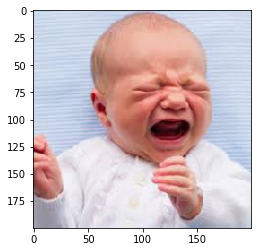

HAPPY


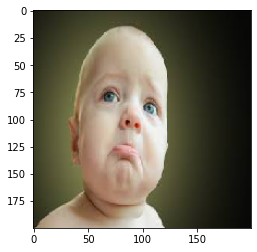

SAD


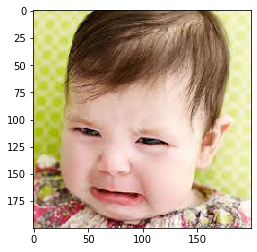

HAPPY


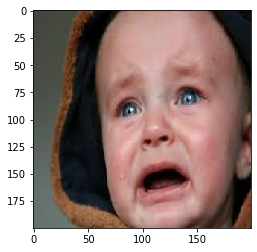

HAPPY


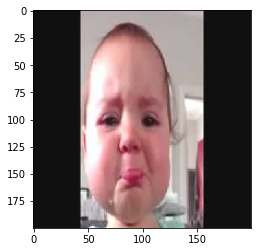

SAD


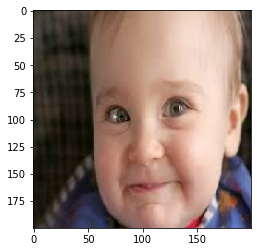

HAPPY


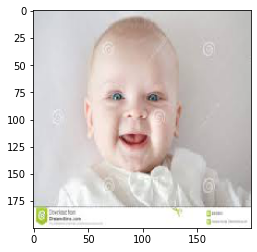

HAPPY


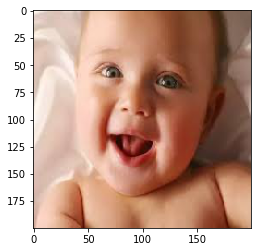

HAPPY


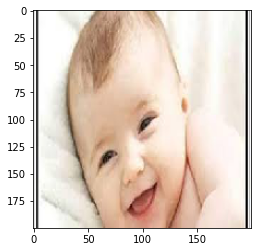

HAPPY


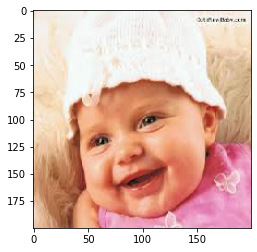

HAPPY


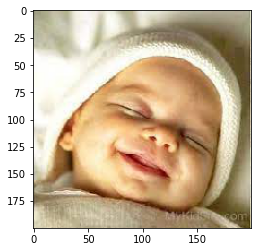

HAPPY


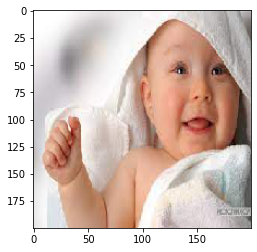

SAD


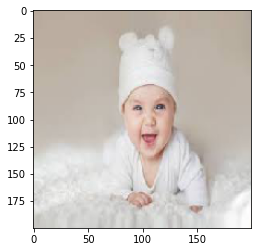

HAPPY


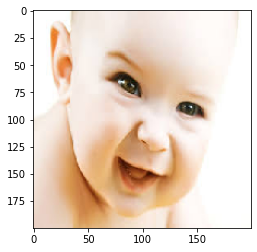

HAPPY


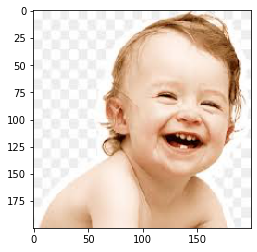

SAD


In [12]:
dir_path='C:/Users/DHARSINI/OneDrive/Pictures/basedata/testing'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("HAPPY")
    else:
        print("SAD")